In [13]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

cox_data=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name='COX data')
cox_data.head()

,Group ID,Study ID,Event Name,Gender,MND type,Site of onset,Motor neurone-dominant features from onset,Date of birth,Sample Date,Age at visit,...,C5,TPP2,C3,TSC22D1,PLEC,TF,BCL2L1,EIF4A3,CHGB,NEFH
0,ALS F1,UCH00136,Index-Case Baseline,female,ALS,"Bulbar, UL",NaN,1935-09-18,2014-09-25,79.0,...,15.364966,11.293299,12.450258,10.493055,8.532551,18.095873,11.726218,8.915282,8.866352,8.518063
1,ALS F10,UCH00153,Index-Case Baseline,male,ALS,Bulbar,NaN,1941-10-18,2015-08-13,73.0,...,15.366326,11.280191,12.980086,10.497453,8.492654,18.134419,10.533330,8.873136,9.021813,9.932953
2,ALS F11,UCH00093,Index-Case Baseline,male,ALS,LL,NaN,1937-01-27,2013-12-19,76.0,...,15.290541,9.816824,12.278014,10.048078,9.548629,17.905072,10.316395,8.997462,9.239360,8.434628
3,ALS F12,UCH00142,Index-Case Baseline,male,ALS,LL,NaN,1946-06-11,2015-01-29,68.0,...,15.750880,10.727155,13.148445,10.454608,8.628263,18.158875,11.030667,8.862327,9.508389,8.939873
4,ALS F13,BUH00447,Index-Case Baseline,male,ALS,Bulbar,PBP - Progressive Bulbar Palsy,1937-04-18,2017-06-28,80.0,...,15.224337,10.149620,11.866545,10.509775,8.776104,17.947340,10.927111,8.867279,9.395534,8.514122


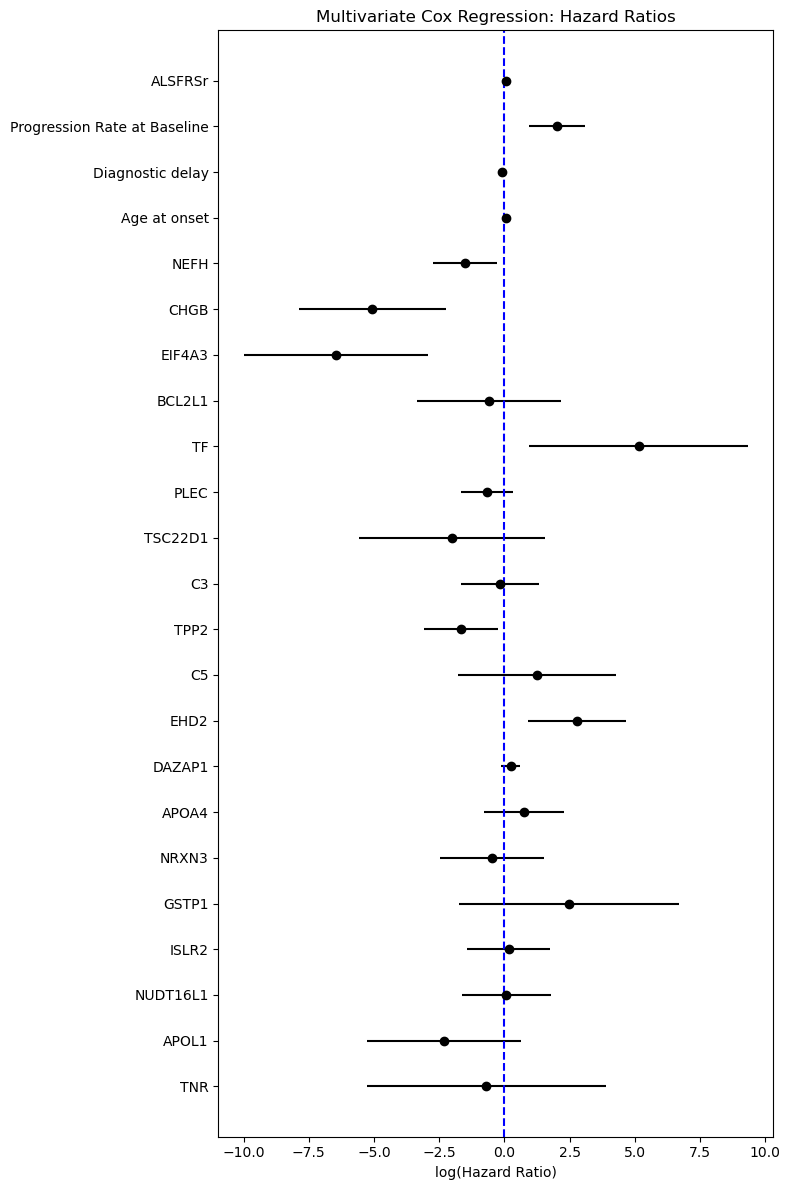

In [4]:
#Multivariate Cox Regression: Forest Plot

cox_data['Outcome'] = 1  # All patients died

# Select predictors
predictors = ['TNR', 'APOL1', 'NUDT16L1', 'ISLR2', 'GSTP1', 'NRXN3', 'APOA4', 'DAZAP1', 'EHD2', 
              'C5', 'TPP2', 'C3', 'TSC22D1', 'PLEC', 'TF', 'BCL2L1', 'EIF4A3', 'CHGB', 'NEFH',
              'Age at onset', 'Diagnostic delay', 'Progression Rate at Baseline', 'ALSFRSr']
cox_model = cox_data[predictors + ['Survival', 'Outcome']].dropna()

# Fit Cox model
cph = CoxPHFitter()
cph.fit(cox_model, duration_col='Survival', event_col='Outcome')

summary = cph.summary.reset_index()
plt.figure(figsize=(8, 12))
plt.errorbar(summary['coef'], summary['covariate'],
             xerr=[summary['coef'] - summary['coef lower 95%'], summary['coef upper 95%'] - summary['coef']],
             fmt='o', color='black')
plt.axvline(0, color='blue', linestyle='--')
plt.title('Multivariate Cox Regression: Hazard Ratios')
plt.xlabel('log(Hazard Ratio)')
plt.tight_layout()
plt.show()

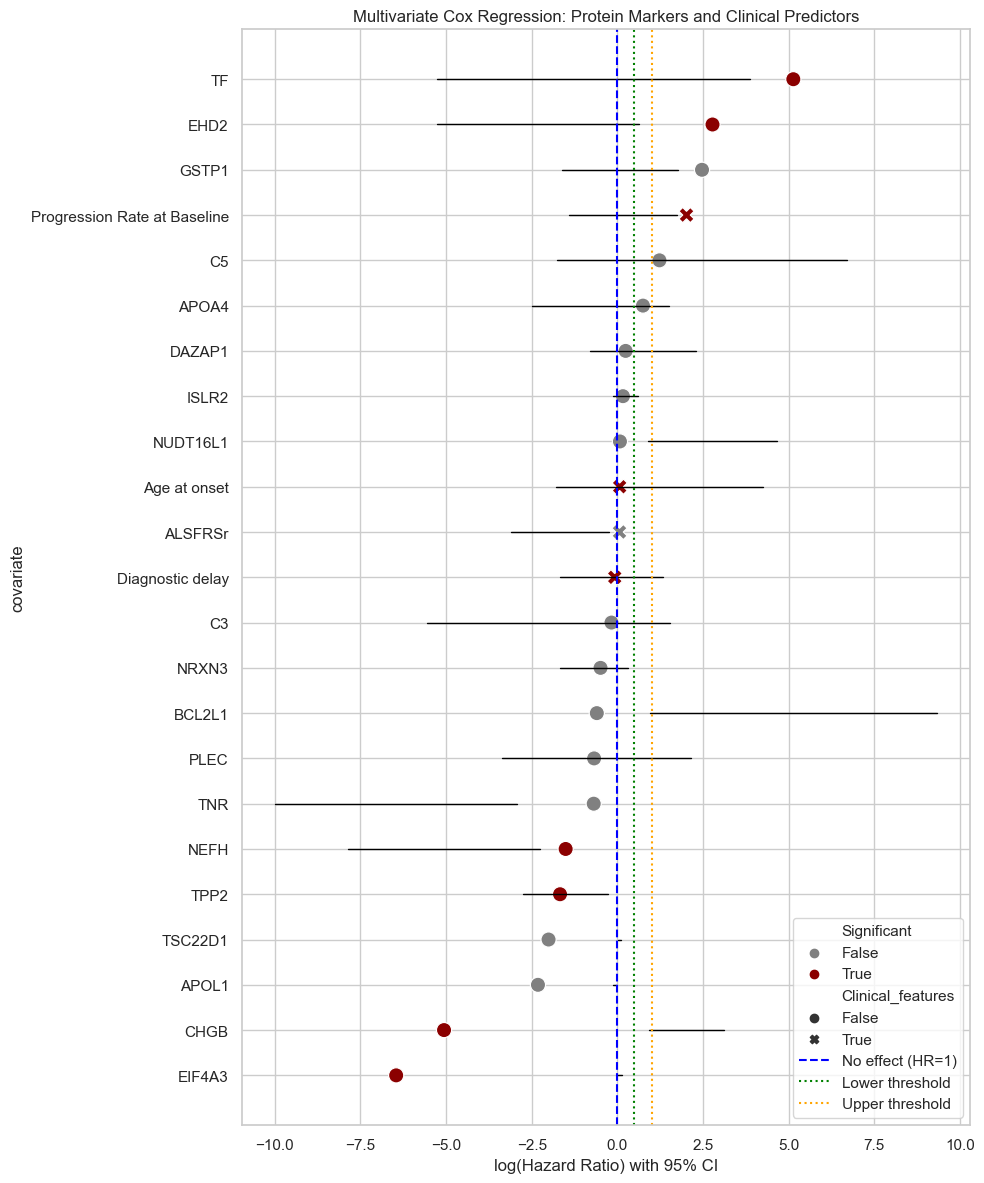

In [7]:
# Prepare summary
summary_df = cph.summary.reset_index()
summary_df = summary_df[['covariate', 'coef', 'exp(coef)', 'p', 'coef lower 95%', 'coef upper 95%']]

# Define clinical predictors
clinical_predictors = [
    'Age at onset',
    'Age at visit',
    'Diagnostic delay',
    'Progression Rate at Baseline',
    'ALSFRSr',
    'Time from onset'
]

# Add flags
summary_df['Significant'] = summary_df['p'] < 0.05
summary_df['direction'] = summary_df['coef'].apply(lambda x: '↑' if x > 0 else '↓')
summary_df['Clinical_features'] = summary_df['covariate'].isin(clinical_predictors)

# Sort for plotting
summary_df = summary_df.sort_values('exp(coef)', ascending=False)

# Plot setup
plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

# Plot points with different markers for clinical vs protein
sns.scatterplot(
    x='coef', y='covariate',
    hue='Significant', style='Clinical_features',
    palette={True: 'darkred', False: 'gray'},
    data=summary_df, s=120, legend='brief'
)

# Confidence intervals
for i, row in summary_df.iterrows():
    plt.plot([row['coef lower 95%'], row['coef upper 95%']], [i, i], color='black', lw=1)

# Threshold lines
plt.axvline(0, color='blue', linestyle='--', label='No effect (HR=1)')
plt.axvline(0.5, color='green', linestyle=':', label='Lower threshold')
plt.axvline(1.0, color='orange', linestyle=':', label='Upper threshold')

# Labels and title
plt.xlabel('log(Hazard Ratio) with 95% CI')
plt.title('Multivariate Cox Regression: Protein Markers and Clinical Predictors')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


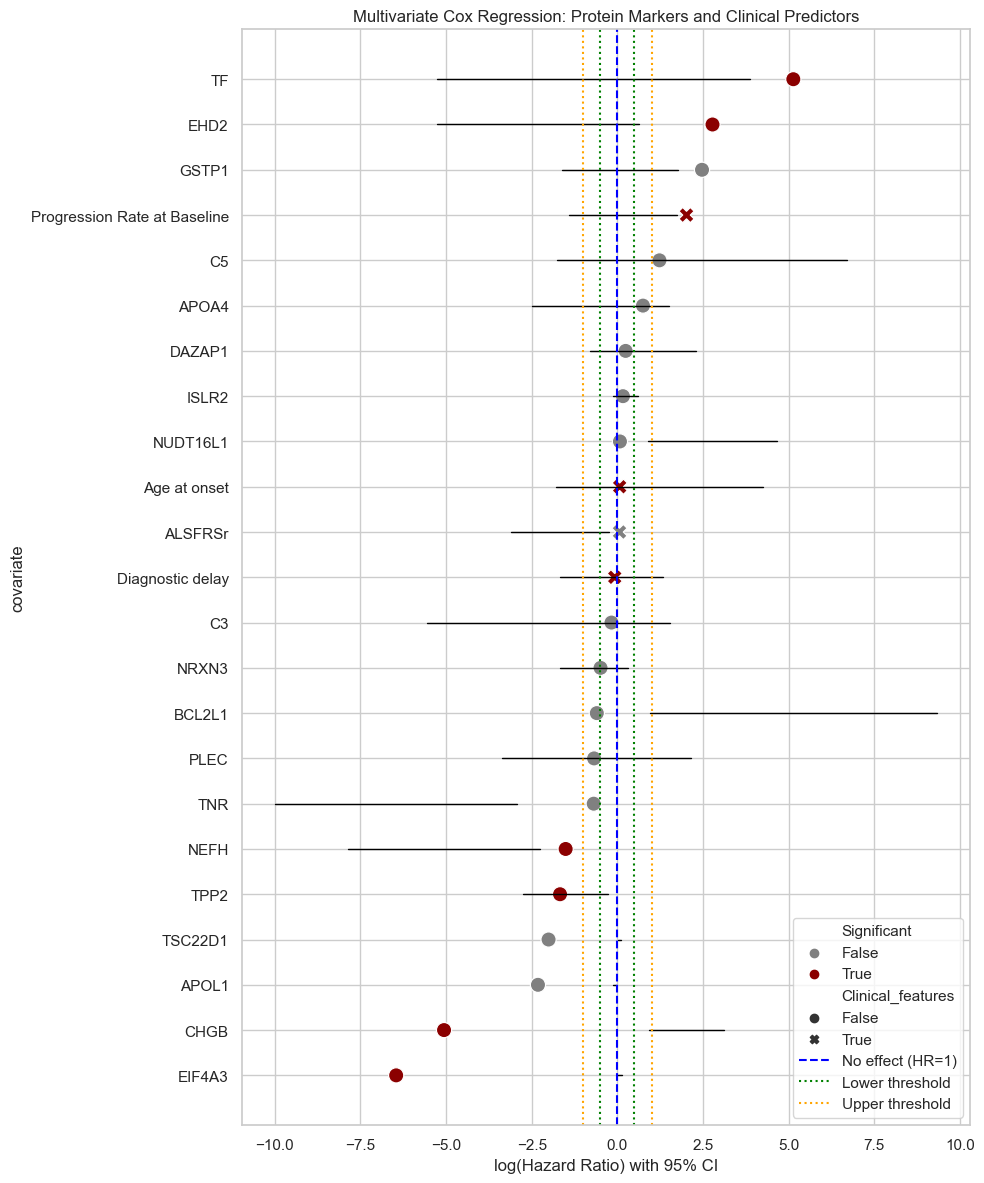

In [14]:
# Prepare summary
summary_df = cph.summary.reset_index()
summary_df = summary_df[['covariate', 'coef', 'exp(coef)', 'p', 'coef lower 95%', 'coef upper 95%']]

# Define clinical predictors
clinical_predictors = [
    'Age at onset',
    'Age at visit',
    'Diagnostic delay',
    'Progression Rate at Baseline',
    'ALSFRSr',
    'Time from onset'
]

# Add flags
summary_df['Significant'] = summary_df['p'] < 0.05
summary_df['direction'] = summary_df['coef'].apply(lambda x: '↑' if x > 0 else '↓')
summary_df['Clinical_features'] = summary_df['covariate'].isin(clinical_predictors)

# Sort for plotting
summary_df = summary_df.sort_values('exp(coef)', ascending=False)

# Plot setup
plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

# Plot points with different markers for clinical vs protein
sns.scatterplot(
    x='coef', y='covariate',
    hue='Significant', style='Clinical_features',
    palette={True: 'darkred', False: 'gray'},
    data=summary_df, s=120, legend='brief'
)

# Confidence intervals
for i, row in summary_df.iterrows():
    plt.plot([row['coef lower 95%'], row['coef upper 95%']], [i, i], color='black', lw=1)

# Threshold lines
plt.axvline(0, color='blue', linestyle='--', label='No effect (HR=1)')

# Positive thresholds
plt.axvline(0.5, color='green', linestyle=':', label='Lower threshold')
plt.axvline(1.0, color='orange', linestyle=':', label='Upper threshold')

# Negative thresholds (mirror)
plt.axvline(-0.5, color='green', linestyle=':')
plt.axvline(-1.0, color='orange', linestyle=':')
# Labels and title
plt.xlabel('log(Hazard Ratio) with 95% CI')
plt.title('Multivariate Cox Regression: Protein Markers and Clinical Predictors')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


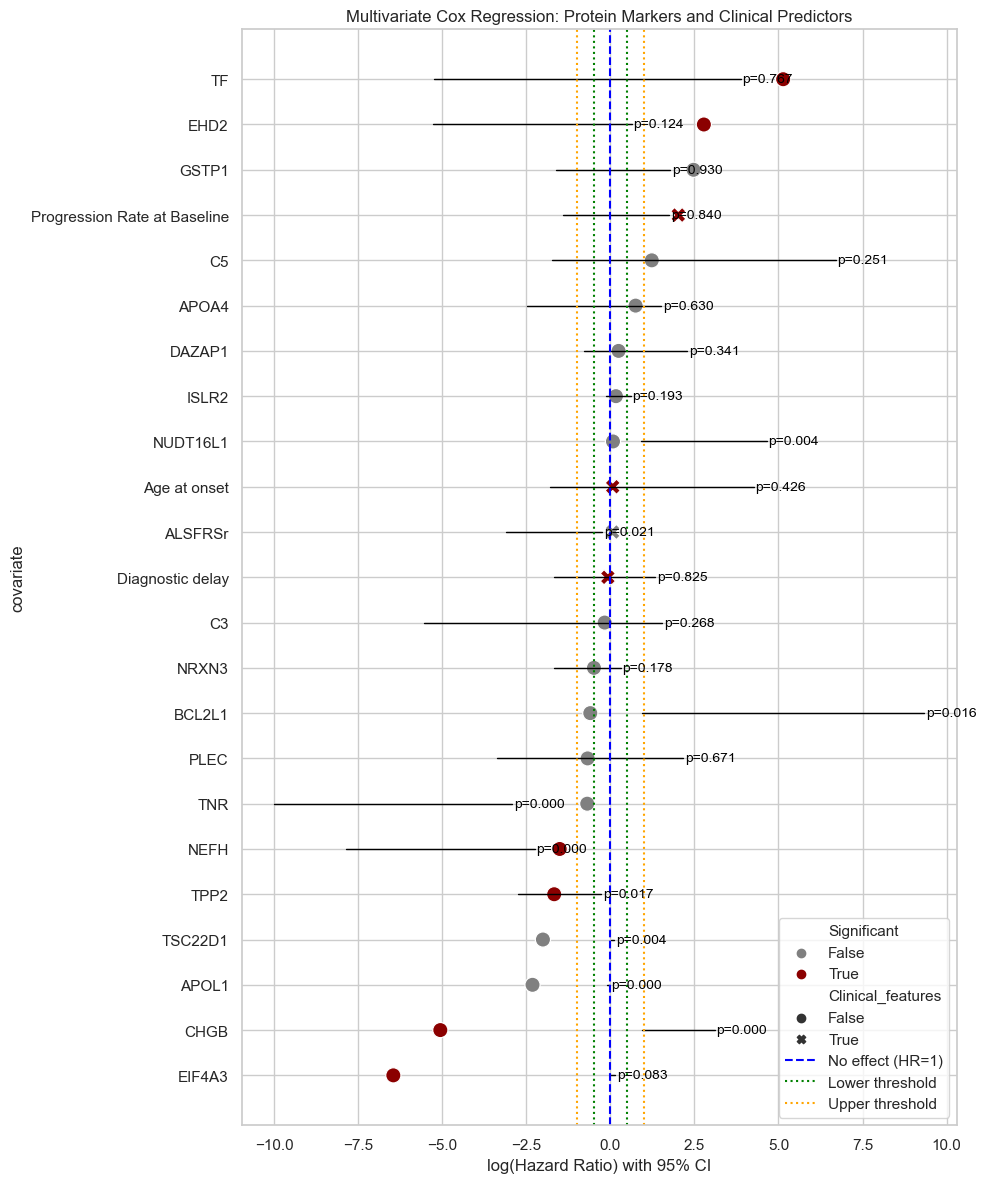

In [11]:
# Plot setup
plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

# Plot points with different markers for clinical vs protein
sns.scatterplot(
    x='coef', y='covariate',
    hue='Significant', style='Clinical_features',
    palette={True: 'darkred', False: 'gray'},
    data=summary_df, s=120, legend='brief'
)

# Confidence intervals
for i, row in summary_df.iterrows():
    plt.plot([row['coef lower 95%'], row['coef upper 95%']], [i, i], color='black', lw=1)
    # Add p-value annotation
    plt.text(
        row['coef upper 95%'] + 0.05,  # position slightly to the right of CI
        i,
        f"p={row['p']:.3f}",           # format p-value to 3 decimals
        va='center', fontsize=10, color='black'
    )

# Threshold lines
plt.axvline(0, color='blue', linestyle='--', label='No effect (HR=1)')
plt.axvline(0.5, color='green', linestyle=':', label='Lower threshold')
plt.axvline(1.0, color='orange', linestyle=':', label='Upper threshold')
plt.axvline(-0.5, color='green', linestyle=':')
plt.axvline(-1.0, color='orange', linestyle=':')

# Labels and title
plt.xlabel('log(Hazard Ratio) with 95% CI')
plt.title('Multivariate Cox Regression: Protein Markers and Clinical Predictors')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [16]:
# Prepare summary
summary_df = cph.summary.reset_index()
summary_df = summary_df[['covariate', 'coef', 'exp(coef)', 'p', 'coef lower 95%', 'coef upper 95%']]

# Convert CI bounds from log-coef to HR scale
summary_df['HR'] = summary_df['exp(coef)']
summary_df['CI_lower'] = np.exp(summary_df['coef lower 95%'])
summary_df['CI_upper'] = np.exp(summary_df['coef upper 95%'])

# Build final table
results_table = summary_df[['covariate', 'HR', 'CI_lower', 'CI_upper', 'p']]

# Round for readability
results_table = results_table.round({'HR': 2, 'CI_lower': 2, 'CI_upper': 2, 'p': 3})

# Display table
print(results_table)


                       covariate      HR  CI_lower  CI_upper      p
0                            TNR    0.50      0.01     48.22  0.767
1                          APOL1    0.10      0.01      1.89  0.124
2                       NUDT16L1    1.08      0.20      5.88  0.930
3                          ISLR2    1.18      0.24      5.76  0.840
4                          GSTP1   11.86      0.17    810.24  0.251
5                          NRXN3    0.61      0.08      4.50  0.630
6                          APOA4    2.11      0.45      9.89  0.341
7                         DAZAP1    1.27      0.88      1.84  0.193
8                           EHD2   16.11      2.48    104.87  0.004
9                             C5    3.42      0.17     70.73  0.426
10                          TPP2    0.19      0.05      0.78  0.021
11                            C3    0.84      0.19      3.81  0.825
12                       TSC22D1    0.13      0.00      4.68  0.268
13                          PLEC    0.51      0.

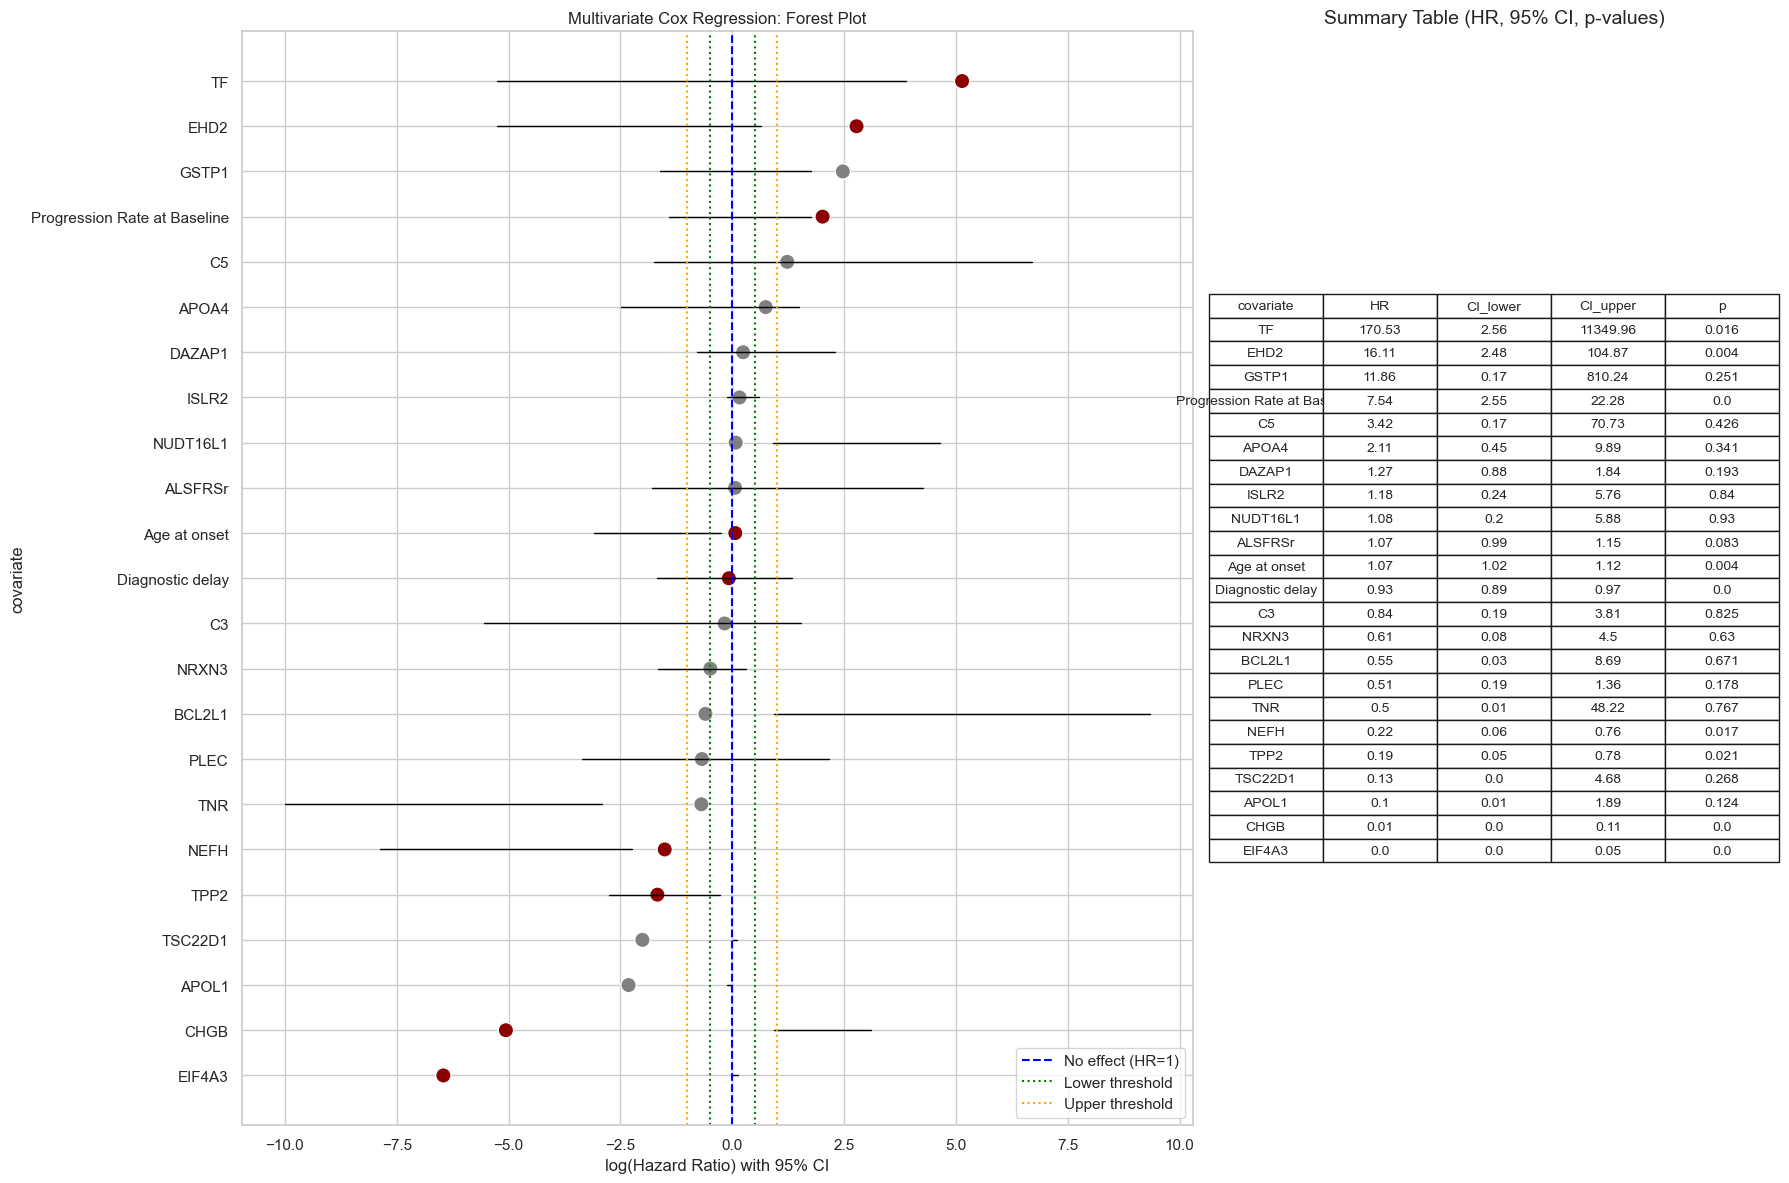

In [19]:
# Prepare summary
summary_df = cph.summary.reset_index()
summary_df = summary_df[['covariate', 'coef', 'exp(coef)', 'p', 'coef lower 95%', 'coef upper 95%']]

# Convert CI bounds from log-coef to HR scale
summary_df['HR'] = summary_df['exp(coef)']
summary_df['CI_lower'] = np.exp(summary_df['coef lower 95%'])
summary_df['CI_upper'] = np.exp(summary_df['coef upper 95%'])

# Round for readability
summary_df['HR'] = summary_df['HR'].round(2)
summary_df['CI_lower'] = summary_df['CI_lower'].round(2)
summary_df['CI_upper'] = summary_df['CI_upper'].round(2)
summary_df['p'] = summary_df['p'].round(3)

# Sort for plotting
summary_df = summary_df.sort_values('HR', ascending=False)

# --- Create figure with two panels ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12), gridspec_kw={'width_ratios':[2,1]})

sns.set(style="whitegrid")

# Forest plot
sns.scatterplot(
    x='coef', y='covariate',
    hue=summary_df['p'] < 0.05, palette={True: 'darkred', False: 'gray'},
    data=summary_df, s=120, legend=False, ax=ax1
)

# Confidence intervals
for i, row in summary_df.iterrows():
    ax1.plot([row['coef lower 95%'], row['coef upper 95%']], [i, i], color='black', lw=1)

# Threshold lines
ax1.axvline(0, color='blue', linestyle='--', label='No effect (HR=1)')
ax1.axvline(0.5, color='green', linestyle=':', label='Lower threshold')
ax1.axvline(1.0, color='orange', linestyle=':', label='Upper threshold')
ax1.axvline(-0.5, color='green', linestyle=':')
ax1.axvline(-1.0, color='orange', linestyle=':')

ax1.set_xlabel('log(Hazard Ratio) with 95% CI')
ax1.set_title('Multivariate Cox Regression: Forest Plot')
ax1.legend(loc='lower right')

# --- Table with HR, CI, p-values ---
table_data = summary_df[['covariate','HR','CI_lower','CI_upper','p']]
ax2.axis('off')  # hide axis
table = ax2.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax2.set_title("Summary Table (HR, 95% CI, p-values)", fontsize=14)

plt.tight_layout()
plt.show()


In [25]:
# === Standardize column names ===
cox_data.columns = (
    cox_data.columns.str.strip()
    .str.replace(" ", "_")
    .str.lower()
)

# === Outcome column (all patients died) ===
cox_data["outcome"] = 1  # event indicator

# === Select predictors ===
predictors = [
    "tnr","apol1","nudt16l1","islr2","gstp1","nrxn3","apoa4","dazap1","ehd2",
    "c5","tpp2","c3","tsc22d1","plec","tf","bcl2l1","eif4a3","chgb","nefh",
    "age_at_onset","diagnostic_delay","progression_rate_at_baseline","alsfrsr"
]

cox_model = cox_data[predictors + ["survival","outcome"]].dropna()

# === Fit Cox model ===
cph = CoxPHFitter()
cph.fit(cox_model, duration_col="survival", event_col="outcome")

# === Prepare summary ===
summary_df = cph.summary.reset_index()
summary_df = summary_df[
    ["covariate","coef","exp(coef)","p","coef lower 95%","coef upper 95%"]
]

# === Flag significant predictors ===
summary_df["significant"] = summary_df["p"] < 0.05
summary_df["direction"] = summary_df["coef"].apply(lambda x: "↑" if x > 0 else "↓")

# === Filter significant proteins ===
significant_proteins = summary_df[
    (summary_df["significant"]) & (~summary_df["covariate"].str.contains("age|diagnostic|progression|alsfrsr"))
]["covariate"].tolist()

# === Keep metadata + significant proteins ===
metadata_cols = [
    "group_id","study_id","event_name","gender","mnd_type","site_of_onset",
    "motor_neurone-dominant_features_from_onset","date_of_birth","sample_date",
    "age_at_visit","date_first_weakness_noticed","date_of_diagnosis",
    "diagnostic_delay","age_at_onset","time_from_onset","time_from_diagnosis",
    "alsfrsr","progression_rate_at_baseline","rip_date","rip_age","survival",
    "outcome_1-rip","features_of_fronto-temporal_involvement",
    "als_diagnostic_classification","on_riluzole","outcome"
]

filtered_df = cox_data[metadata_cols + significant_proteins]



In [ ]:
filtered_df.to_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data COX filtered.xlsx")